# Term Project

## Analyzing the Stroke Prediction Dataset using Feature Selection for Supervised Learning
### Made By: Katie Yang

***

**Project Overview**
*  The goal of this project is to attempt to predict the likelihood of a patient experiencing a stroke based on demographic and other health-related features.
*  I will be using feature selection techniques in order to identify the most relavant predictors and then apply classification models (logistic regression, random forest)
 *  **Models:** Logistic Regression, Random Forest, Support Vector Machine (SVM)
* By finding the most important features, I hope to be able to create a more efficient model to predict the likelihood of experiencing a stroke
  *  **Goal:** Optimize prediction of stroke occurence and improve model performance through feature selection

***

**Dataset Description**
*  Name: [Stroke Prediction Dataset (Kaggle)](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset)
*  Motivation:  According to the World Health Organization, stroke is the 2nd leading casue of death globaly (responsible for about 11% of total deaths). This dataset contains health-related information such as gender, age, and smoking states for each patient in order to predict whether a patient is likely to get stroke.
*  Rows: 5110
*  Attributes: 12
*  Key Variables:
 *  Target: stroke (1 = Yes, 0 = No)
 *  Features: gender, age, hypertension, heart_disease, ever_married, work_type, residence_type, avg_glucose_level, bmi, smoking_status


***

**Research Question & Learning Model**
<br>Research Question:
*  Which features are best at predicting stroke occurence?
*  How accurately can we predict stroke risk using a supervised classification model?

<br>Learning Model:
*  Type: Feature Selection in Supervised Learning
 *  Goal of Feature Selection techniques is to find the best set of features that allows us to build optimized models. Supervised learning is when these techniques are used for labeled data and identify the relavant features for increasing the efficiency of supervised models like classification and regression.
*  Feature Selection Classification Models:
 *  Logistic Regression
 *  Random Forest
 *  SVM
*  Feature Selection Methods:
 *  Correlation Coefficient
 *  Chi-Squared Test
 *  Fisher's Score
 *  Random Forest Importance
 *  Recursive Feature Elimination (Will use this method in this project to compare results)

<br> Potential Class Imbalance:
*  Given the potential imbalance in the stroke occurances, the following steps will be followed:
 *  Visualize class distribution
 *  Use SMOTE during the training process in order to oversample the minority class and improve generalization

***

**Data Preparation**
*  Cleaning:
 *  Handle missing/unknown values (eg. bmi, smoking_status)
 *  Ensure that there are no negative numbers/no numbers out of expected range
 *  Convert all the categorical variables into numerical values
 *  Check for duplicate IDs, then drop the id column
 *  Normalize/Scale features when needed
 *  **Addressing Potential Class Imbalance in Stroke Label:** use class weighting in the models (apply Synthetic Minority Oversampling Technique (SMOTE) to generate samples for the minority classes)

***

**Evaluation and Assessment**
<br>Evaluation Strategy:
*  Train-Test Split to make sure there is a balanced representation of classes

*  I will address class imbalances using SMOTE
 *  SMOTE (Synthetic Minority Oversampling) - will be used to balance imbalanced datasets by generating synthetic samples of the minority class to improve model performance

<br>Performance Metrics:
*  Accuracy
*  Precision, Recall, F1-score
 *  Important to have high values of both as false negatives may lead to untreated medical conditions while false positives may result in cases of overmedicalization
*  ROC - AUC Score
 *  Measures the classification model's ability to distinguish between stroke/no stroke classes (high scores = better discriminatory power)
*  Confusion Matrix Analysis

*  We will assess:
 *  Ranking of selected features
 *  Impact of selected features on the model performance
 *  Comparision before/after feature selection
 *  Evaluation of overfitting reduction and model efficiency

***

**Implementation Plan**
<br>Basic Steps:
> 1. Load and clean data
> 2. Address any potential class imbalance
> 3. Apply feature selection techniques
> 4. Train classification models with selected features
> 5. Evaluate model perfomances
> 6. Interpret and visualize results
> 7. Interpret findings

***

**Expectations**
*  Age, hypertension, and heart disease will be highly ranked predictors of stroke
*  Random forest will perform better than logistic regression due the ability to model nonlinear relationships
*  Feature selection will reduce overfitting and improve model efficiency

### Data Loading

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, chi2, f_classif, RFE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# load dataset from kaggle website
import kagglehub
from kagglehub import dataset_download
path = kagglehub.dataset_download("fedesoriano/stroke-prediction-dataset")
stroke_df = pd.read_csv(f"{path}/healthcare-dataset-stroke-data.csv")

# preview of the raw data
stroke_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Looking at the preview of the data, we can see that there are several options in each of the categorical columns (which might cause issues later) as well as NaN values (in bmi).

In [ ]:
# checking dataset info as well as for missing items
stroke_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Checking for the dataset here, we can see that the bmi columns contains some Null values (there should be a total of 5110 non-null counts) as well as incompatible data types (object).

To address the null values in the bmi column and due to the small dataset, instead of dropping the rows with null values, I will replace it with the mean of all of the values.

### Data Cleaning and Preparing

* Clean the dataset by handling missing values
* Address any potential issues with negative numbers
* Convert categorical variables to numerical ones.
* Drop unnecessary columns (id) after checking for duplicates
* Normalize/Scale features when needed
* Addressing Potential Class Imbalance in Stroke Label: use class weighting in the models (apply Synthetic Minority Oversampling Technique (SMOTE) to generate samples for the minority classes)
 * To be used later in the model training portion

* Preview what the results would be before feature selection

In [ ]:
# deal with missing values for columns "bmi" by replacing mean for Null "bmi" values
stroke_df["bmi"].fillna(stroke_df["bmi"].mean(), inplace = True)

# make sure that there are no negative numbers
stroke_df = stroke_df[(stroke_df["age"] >= 0)]
stroke_df = stroke_df[(stroke_df["hypertension"] >= 0)]
stroke_df = stroke_df[(stroke_df["heart_disease"] >= 0)]
stroke_df = stroke_df[(stroke_df["avg_glucose_level"] >= 0)]
stroke_df = stroke_df[(stroke_df["bmi"] >= 0)]
stroke_df = stroke_df[(stroke_df["stroke"] >= 0)]

<ipython-input-4-168bfe723e51>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  stroke_df["bmi"].fillna(stroke_df["bmi"].mean(), inplace = True)


In [ ]:
# convert categorical variables to numerical 0 or 1 using map()
# dropped "other" categories from gender
stroke_df = stroke_df[stroke_df["gender"].isin(["Male", "Female"])]
stroke_df["gender1"] = stroke_df["gender"].map({'Male': 0, 'Female': 1})
stroke_df["ever_married1"] = stroke_df["ever_married"].map({'No': 0, 'Yes': 1})
stroke_df["Residence_type1"] = stroke_df["Residence_type"].map({'Urban': 0, 'Rural': 1})

<ipython-input-5-5aab4a8a12b1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stroke_df["gender1"] = stroke_df["gender"].map({'Male': 0, 'Female': 1})
<ipython-input-5-5aab4a8a12b1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stroke_df["ever_married1"] = stroke_df["ever_married"].map({'No': 0, 'Yes': 1})
<ipython-input-5-5aab4a8a12b1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

In [ ]:
# these categorical variables were a little more difficult to work with
# one-hot encode 'work_type' and 'smoking_status', then drop the column
# decided to compare one type of work/smoking status at a time (0: does not have that type, 1: specified type)
# one-hot encoding to the two columns but returns True/False
# drop_first = true drops the first category in each column to prevent highly correlated independent variables (multicollinearity)
stroke_df = pd.get_dummies(stroke_df, columns = ['work_type', 'smoking_status'], drop_first = True)

# convert boolean columns into numbers
bool_columns = stroke_df.select_dtypes(include = 'bool').columns
stroke_df[bool_columns] = stroke_df[bool_columns].astype(int)

In [ ]:
# drop unnecessary columns so only floats/ints remain
# axis = 1 (drops the column, not row), inplace = True (edits the origianl database)
if 'id' in stroke_df.columns:
    stroke_df.drop('id', axis = 1, inplace = True)
if 'gender' in stroke_df.columns:
    stroke_df.drop('gender', axis = 1, inplace = True)
if 'ever_married' in stroke_df.columns:
    stroke_df.drop('ever_married', axis = 1, inplace = True)
if 'Residence_type' in stroke_df.columns:
    stroke_df.drop('Residence_type', axis = 1, inplace = True)

# check and remove duplicates
stroke_df.drop_duplicates(inplace = True)

# Check if the data is clean now
stroke_df.info()
stroke_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 5109 entries, 0 to 5109
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             5109 non-null   float64
 1   hypertension                    5109 non-null   int64  
 2   heart_disease                   5109 non-null   int64  
 3   avg_glucose_level               5109 non-null   float64
 4   bmi                             5109 non-null   float64
 5   stroke                          5109 non-null   int64  
 6   gender1                         5109 non-null   int64  
 7   ever_married1                   5109 non-null   int64  
 8   Residence_type1                 5109 non-null   int64  
 9   work_type_Never_worked          5109 non-null   int64  
 10  work_type_Private               5109 non-null   int64  
 11  work_type_Self-employed         5109 non-null   int64  
 12  work_type_children              5109 no

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender1,ever_married1,Residence_type1,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.600000,1,0,1,0,0,1,0,0,1,0,0
1,61.0,0,0,202.21,28.893237,1,1,1,1,0,0,1,0,0,1,0
2,80.0,0,1,105.92,32.500000,1,0,1,1,0,1,0,0,0,1,0
3,49.0,0,0,171.23,34.400000,1,1,1,0,0,1,0,0,0,0,1
4,79.0,1,0,174.12,24.000000,1,1,1,1,0,0,1,0,0,1,0


In this cleaning process, we were able to succesfully clean the data and convert any categorical values into binary ones using one-hot encoding.

All the remaining columns are now numeric and non-null.

In [ ]:
# normalizing/scaling continuous numerical values
# eg. age, avg_glucose_level, bmi
features_to_scale = ['age', 'avg_glucose_level', 'bmi']

scaler = StandardScaler()
stroke_df[features_to_scale] = scaler.fit_transform(stroke_df[features_to_scale])

In [ ]:
# dealing with potential class imbalances in the stroke occurance
# normalize = true to get back proportions instead of counts
stroke_df['stroke'].value_counts(normalize = True)

,proportion
stroke,
0,0.951262
1,0.048738


As we can see, there is a large class imbalance as only 4.87% of the data is positive for stroke.

In [ ]:
# split into x, y
X = stroke_df.drop('stroke', axis = 1)
y = stroke_df['stroke']

# train-test split with stratification
# decided to split it 40/60
# statify = y (makes sure the ration of 0:1 is preserved in the test/train set)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, stratify = y, random_state = 42)

# apply SMOTE for our training set to address class imbalance
smote = SMOTE(random_state = 42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

<ipython-input-12-8b0db160e128>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = y_train, palette = "Set2")


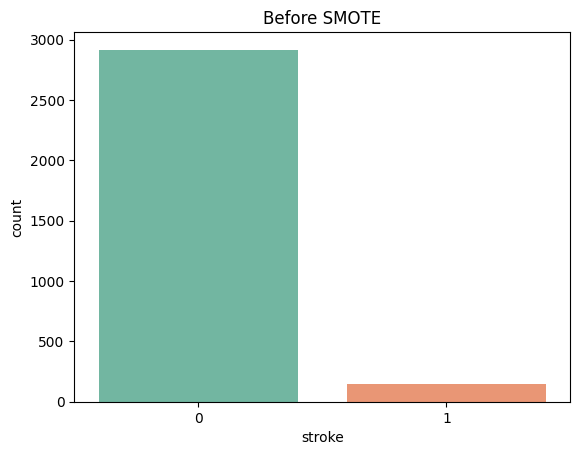

<ipython-input-12-8b0db160e128>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = y_train_smote, palette = "Set2")


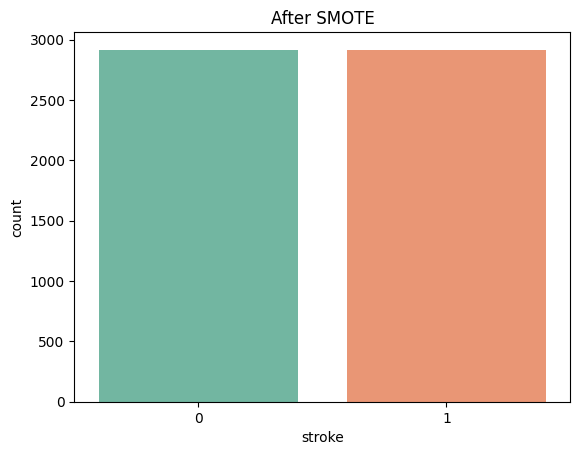

In [ ]:
# smote plots for visualization purposes
sns.countplot(x = y_train, palette = "Set2")
plt.title("Before SMOTE")
plt.show()

sns.countplot(x = y_train_smote, palette = "Set2")
plt.title("After SMOTE")
plt.show()

After using SMOTE, our training set has equal counts of 0/1 for stroke. This will address class unbalance and improve model performance.

In [ ]:
# preview model performance before any feature selection
# solver = "liblinear" (optimal model parameters that is good for smaller datasets with binrary classification)
model_l = LogisticRegression(max_iter = 1000, solver = "liblinear")
model_rf = RandomForestClassifier(random_state = 42)
model_svm = SVC(kernel = "linear", probability = True, random_state = 42)

models = {"Logistic Regression": model_l, "Random Forest": model_rf, "SVM": model_svm}

In [ ]:
# evaluate/plot metrics
def evaluate_model(name, model, X_train, X_test, y_train, y_test):
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)


  print(f"\n----- {name} -----")
  print("Classification Report:")
  print(classification_report(y_test, y_pred))

  # annot = True (add values from matrix onto plot), fmt = "d" (d = decimal), cmap = "Blues" (blue color pallete)
  print("Confusion Matrix:")
  sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = "d", cmap = "Purples")
  plt.title(f"Confusion Matrix - {name}")
  plt.xlabel("Predicted")
  plt.ylabel("Actual")
  plt.show()


----- Logistic Regression -----
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.75      0.85      1944
           1       0.14      0.76      0.23       100

    accuracy                           0.75      2044
   macro avg       0.56      0.76      0.54      2044
weighted avg       0.94      0.75      0.82      2044

Confusion Matrix:


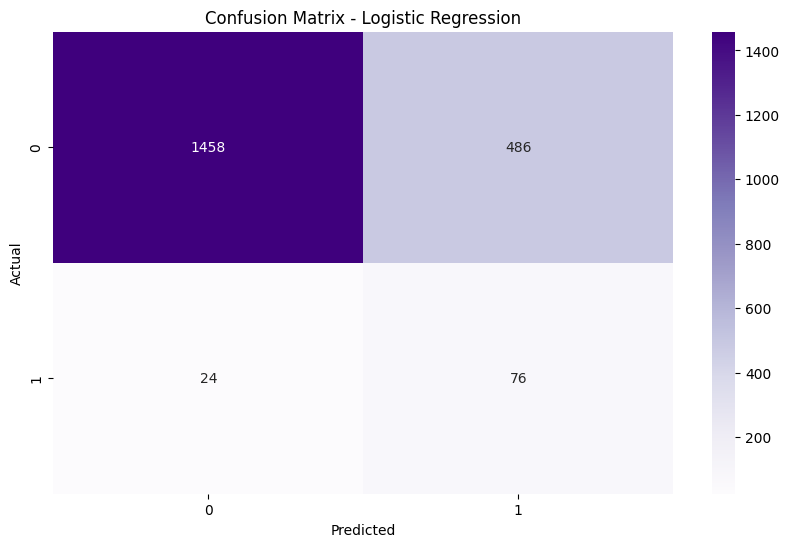


----- Random Forest -----
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.93      0.94      1944
           1       0.14      0.24      0.18       100

    accuracy                           0.89      2044
   macro avg       0.55      0.58      0.56      2044
weighted avg       0.92      0.89      0.91      2044

Confusion Matrix:


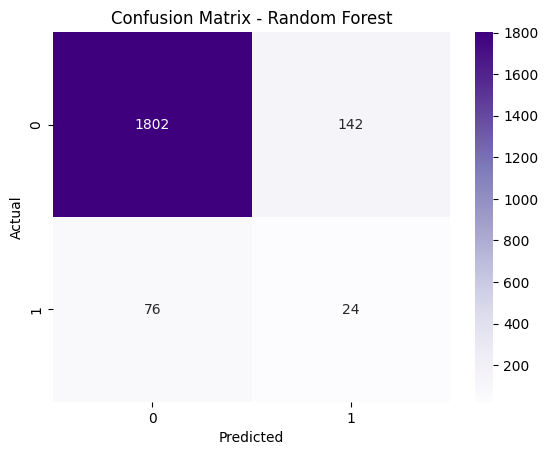


----- SVM -----
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.73      0.84      1944
           1       0.12      0.76      0.21       100

    accuracy                           0.73      2044
   macro avg       0.55      0.74      0.52      2044
weighted avg       0.94      0.73      0.80      2044

Confusion Matrix:


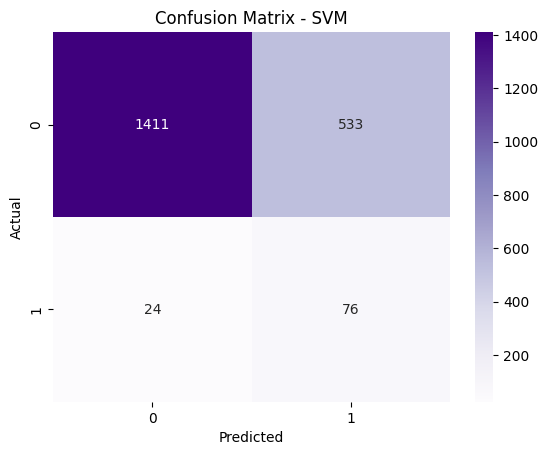

In [ ]:
# evaluation for all models
plt.figure(figsize = (10, 6))
for name, model in models.items():
    evaluate_model(name, model, X_train_smote, X_test, y_train_smote, y_test)

These model evaluations were done prior to any feature selection.

Logistic Regression:
*  Precision - Out of all predicted strokes, only 14% of them were actually strokes (really bad and means that there are many cases of diagnosed stroke cases for patients that don't have stroke (waste of money/resources)).
*  Recall - Out of all the actual stroke cases, 76% of them were caught (which is not the best, but also not the worst).
*  F1-Score - With values of 0.85 and 0.23, the model does an adequete job with non-stroke cases and a poor job with stroke cases.

Random Forest:
*  Precision - Out of all predicted strokes, only 14% of them were actually strokes (really bad and means that there are many cases of diagnosed stroke cases for patients that don't have stroke (waste of money/resources)).
*  Recall - Out of all the actual stroke cases, only 24% of them were caught (really bad score which means that many patients with stroke are not getting the help they need).
*  F1-Score - With values of 0.94 and 0.18, the model does a great job with non-stroke cases and a very poor job with stroke cases.

SVM:
*  Precision - Out of all predicted strokes, only 12% of them were actually strokes (really bad and means that there are many cases of diagnosed stroke cases for patients that don't have stroke (waste of money/resources)).
*  Recall - Out of all the actual stroke cases, 76% of them were caught (which is not the best, but also not the worst).
*  F1-Score - With values of 0.84 and 0.21, the model does an adequete job with non-stroke cases and a poor job with stroke cases.

<br>

Both the logistic regression model and SVM are detecting more stroke cases (compared to Random Forest) which is good if increasing recall/decreasing false negatives (not diagnosing patients who do have stroke) is important.

All the models have low precision value which is not good if increasing precision/decreasing false positives (diagnosing healthy patients with stroke) is important.

### Feature Selection: Identifying the Most Relevant Features
*  Apply feature selection methods to determine which features are most important for predicting stroke
*  Looking at the Top 5 of each method

a. Correlation Matrix
*  Check how each feature correlates with the target (Stroke)
* Observe if there are any lineary correlated features with the target variable

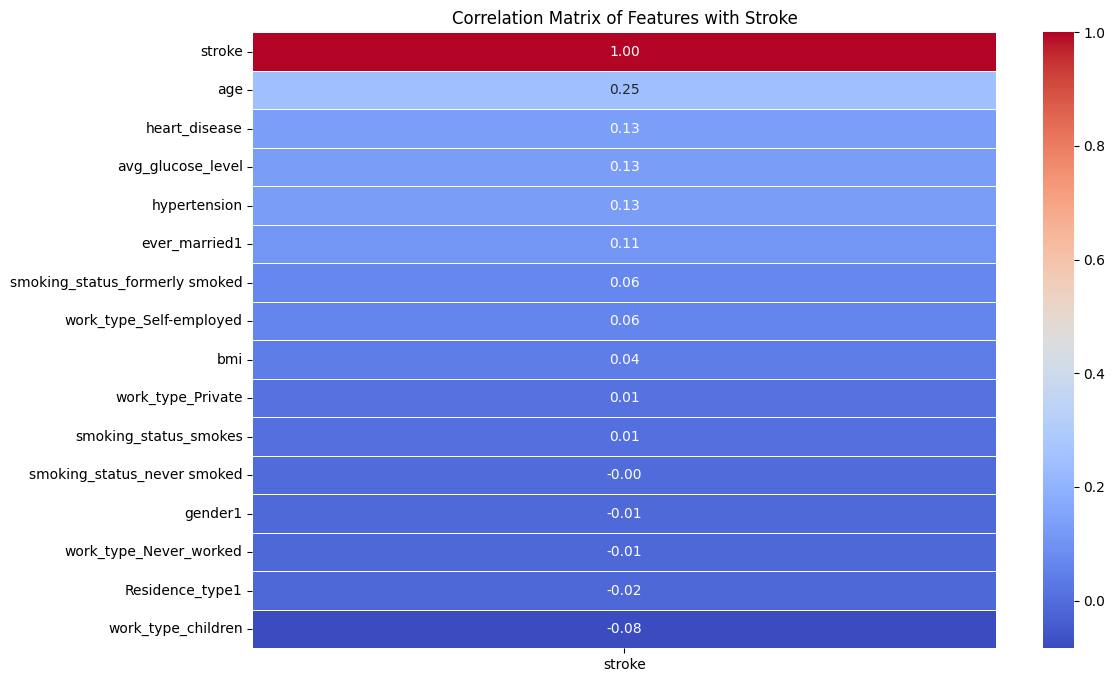

In [ ]:
# correlation matrix to see relationships between features
correlation_df = stroke_df.copy()
corr_matrix = correlation_df.corr()

# plot heatmap
plt.figure(figsize = (12, 8))
sns.heatmap(corr_matrix[["stroke"]].sort_values(by = "stroke", ascending = False), annot = True, cmap = "coolwarm", fmt = ".2f", linewidths = 0.5)
plt.title('Correlation Matrix of Features with Stroke')
plt.show()

As seen in the heatmap containing the correlations between all of the features and stroke, we can see that Stroke has weak linear correlations for all of its features.

Top 5:
*  age (0.25) - There is a weak positive correlation that indicates that older patients are more likely to have strokes.
*  heart_disease (0.13) - There is a very weak positive correlation that indicates that those with other heart disease are more likely to have strokes.
*  avg_glucose_level (0.13) - There is a very weak positive correlation that indicates that those with higher blood sugar levels are more likely to have strokes.
*  hypertension (0.13) - There is a very weak positive correlation that indicates that those with hypertension are more likely to have strokes.
*  ever_married1 (0.11) - There is a very weak positive correlation that indicates that those who are married are more likely to have strokes.

Interpretations:
*  There might not be a linear relationship between these features and stroke
*  Correlation best measures the strength of continuous variables
 *  A lot of the columns are binary variables

b. Chi-Squared Test
*  For categorical features, apply the Chi-squared test
 *  To assess the dependence between the features and the target variable.

                           Feature  Chi2 Score
2                    heart_disease   87.957296
1                     hypertension   75.418319
0                              age   44.442344
11              work_type_children   31.118795
6                    ever_married1   20.595671
12  smoking_status_formerly smoked   17.676894
10         work_type_Self-employed   16.570851
3                avg_glucose_level   16.512286
8           work_type_Never_worked    1.127160
7                  Residence_type1    0.616834
14           smoking_status_smokes    0.343764
9                work_type_Private    0.310847
4                              bmi    0.282361
5                          gender1    0.174397
13     smoking_status_never smoked    0.055750


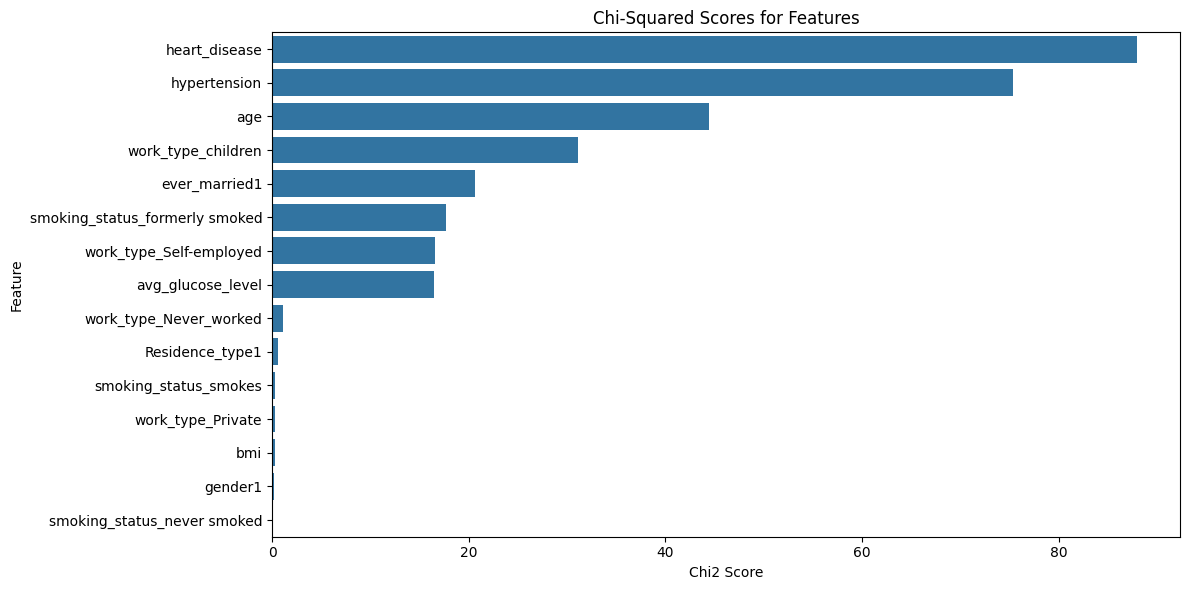

In [ ]:
# making sure all inputs are positive
X_chi2 = X.copy()
X_chi2[["age", "avg_glucose_level", "bmi"]] = MinMaxScaler().fit_transform(X_chi2[["age", "avg_glucose_level", "bmi"]])

# apply chi
# by choosing k = all, we can rank later
chi2_selector = SelectKBest(chi2, k = "all")
chi2_selector.fit(X_chi2, y)

# display chi results
chi2_scores = pd.DataFrame({"Feature": X.columns, "Chi2 Score": chi2_selector.scores_}).sort_values(by = "Chi2 Score", ascending = False)

# top features
print(chi2_scores)

# bar plot
plt.figure(figsize = (12, 6))
sns.barplot(x = "Chi2 Score", y = "Feature", data = chi2_scores)
plt.title("Chi-Squared Scores for Features")
plt.tight_layout()
plt.show()

As seen in the heatmap as well as the Chi^2 values, we can see that heart_disease, hypertension, age, work_type_children, ever_married1, smoking_status_formerly_smoked, work_type_self_employed, and avg_glucose_level had notible relationships with stroke.

Top 5:

*  heart_disease (87.96) - There is a very strong relationship between having a heart disease and stroke.
*  hypertension (75.42) - There is a very strong relationship between hypertension and stroke.
*  age (44.44) - There is a strong/moderate relationship between age and stroke.
*  work_type_children (31.12) - There is a moderate/weak relationship between being a child and stroke.
*  ever_married1 (20.60) - There is a weak relationship between being married and stroke.

Interpretations:

This method works best for categorical features (heart_disease, hypertension, work_type_children, and ever_married1).

There is a significant decrease in the Chi^2 value after avg_glucose_level (formerly smoked, self-employed meeting this threshold). This indicates that the rest of the features have weak or no relationship with stroke.

c. Fisher's Score
*  Measures how well a feature can distinguish between stroke/no stroke
*  Which means that those with higher Fisher's Scores have values that are very different between the two classes

                           Feature  Fisher's Score
0                              age      326.799849
2                    heart_disease       94.666779
3                avg_glucose_level       90.550026
1                     hypertension       84.919947
6                    ever_married1       60.609558
11              work_type_children       36.194030
12  smoking_status_formerly smoked       21.456849
10         work_type_Self-employed       19.803145
4                              bmi        7.744511
7                  Residence_type1        1.213760
8           work_type_Never_worked        1.131843
9                work_type_Private        0.726647
5                          gender1        0.421144
14           smoking_status_smokes        0.406421
13     smoking_status_never smoked        0.088505


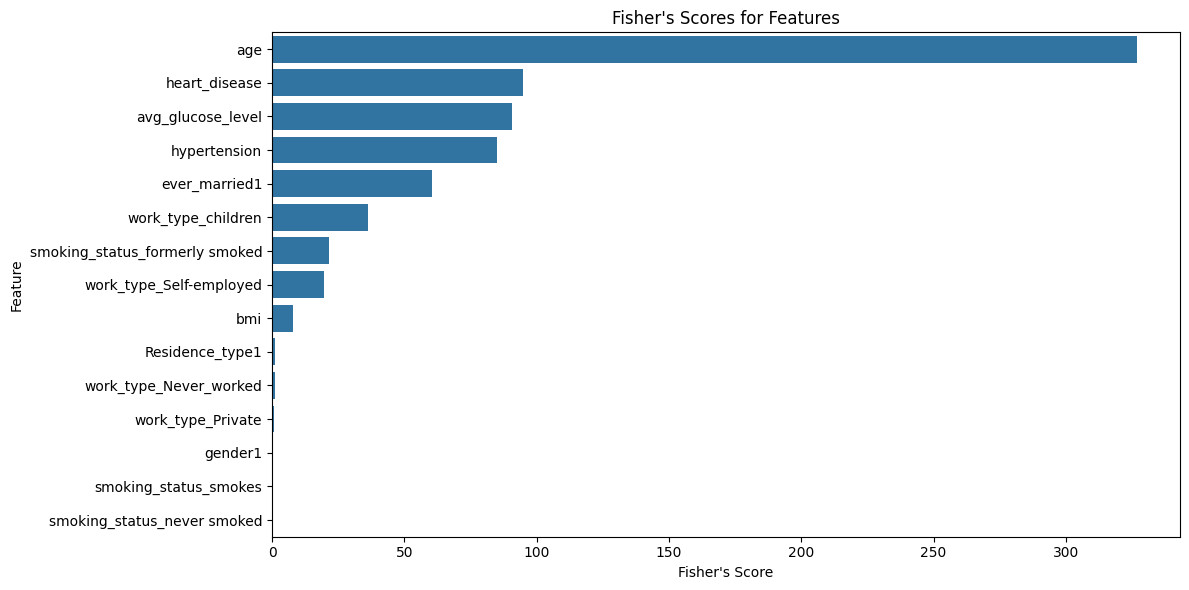

In [ ]:
# fisher's Score
fisher_selector = SelectKBest(f_classif, k = "all")
fisher_selector.fit(X, y)

fisher_scores = pd.DataFrame({"Feature": X.columns, "Fisher's Score": fisher_selector.scores_}).sort_values(by = "Fisher's Score", ascending = False)

print(fisher_scores)

# plotting Fisher's Scores
plt.figure(figsize = (12, 6))
sns.barplot(x = "Fisher's Score", y = "Feature", data = fisher_scores)
plt.title("Fisher's Scores for Features")
plt.tight_layout()
plt.show()

As seen in the heatmap as well as the Fisher's Scores, we can see that age, heart_disease, avg_glucose_level, hypertension, ever_married, work_type_children, smoking_status_formerly_smoked, work_type_self_employed, and bmi had discriminatory power and are able to help separate between stroke/no stroke classes.

Top 5:

*  age (326.80) - Age values are extremely different between stroke/no stroke.
*  heart_disease (94.67) - Heart disease occurence values are different between stroke/no stroke.
*  avg_glucose_level (90.55) - The average blood sugar levels are different between stroke/no stroke.
*  hypertension (84.92) - Hypertension occurence values are different between stroke/no stroke.
*  ever_married1 (60.61) - Being married/not being married values are different between stroke/no stroke.

Interpretations:

There is a significant decrease in the Fisher's Score after bmi which means that the rest of the features do not help separate between stroke/no stroke. This indicates that the rest of the features have weak or no relationship with stroke.

d. Random Forest Importance
*  Uses the decision trees from the Random Forest model to assess the importance of each feature
*  The feature importance is computed by looking at how much each feature improves the model's prediction accuracy
 *  Shows how frequently and how effectively a feature is used to classify stroke/no stroke

                           Feature  Random Forest Importance
3                avg_glucose_level                  0.278155
0                              age                  0.247990
4                              bmi                  0.236840
5                          gender1                  0.031598
7                  Residence_type1                  0.031571
1                     hypertension                  0.027483
2                    heart_disease                  0.023839
13     smoking_status_never smoked                  0.022119
9                work_type_Private                  0.022110
12  smoking_status_formerly smoked                  0.020944
10         work_type_Self-employed                  0.019654
14           smoking_status_smokes                  0.018317
6                    ever_married1                  0.018021
11              work_type_children                  0.001309
8           work_type_Never_worked                  0.000050


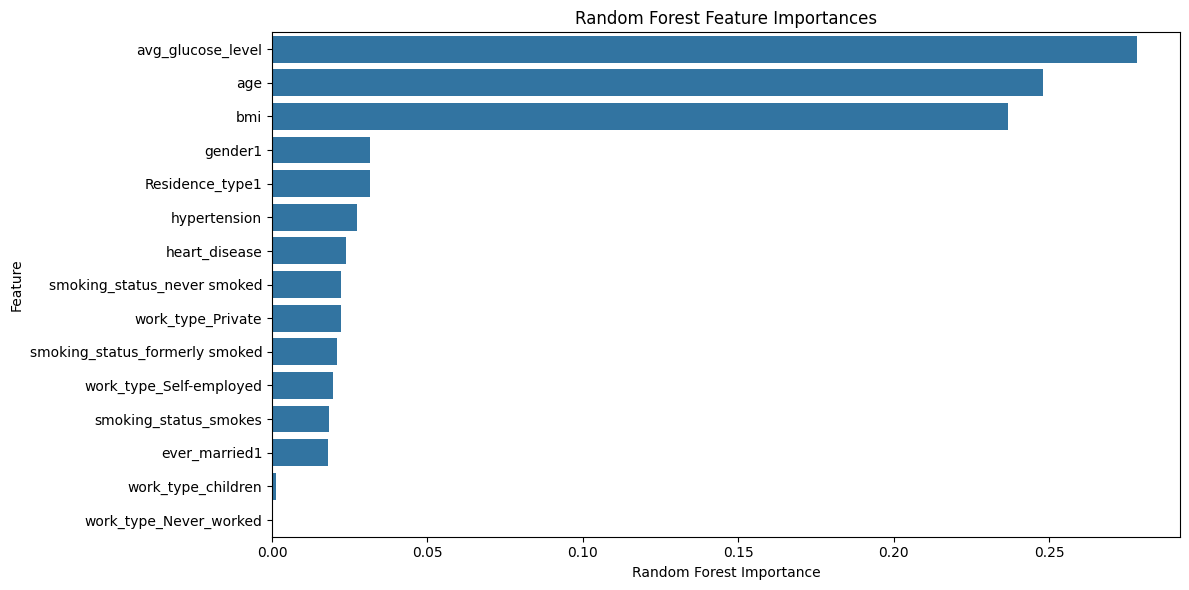

In [ ]:
# fit a random forest model to compute feature importances
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf_model.fit(X, y)

# display feature importances from the trained Random Forest
rf_importances = pd.DataFrame({"Feature": X.columns, "Random Forest Importance": rf_model.feature_importances_}).sort_values(by = "Random Forest Importance", ascending = False)
print(rf_importances)

# plot
plt.figure(figsize = (12, 6))
sns.barplot(x = "Random Forest Importance", y = "Feature", data = rf_importances)
plt.title("Random Forest Feature Importances")
plt.tight_layout()
plt.show()

As seen in the heatmap as well as the Random Forest Importance values, we can see that avg_glucose_level was the most important followed by age, bmi, gender1, and Residence_type1.

Top 5:

avg_glucose_level (0.278) - Blood sugar levels are strongly linked to stroke risk.
age (0.248) - Age is strongly linked to stroke risk.
bmi (0.237) - BMI is strongly linked to stroke risk.
gender1 (0.032) - Gender has a moderate link to stroke risk.
Residence_type1 (0.032) - Residence type (rural/urban) has a moderate link to stroke list.

Interpretations:

There are two significant drops in the Random Forst Importance values. The first is between bmi and gender and the second is between being married and being a child. This indicates that glucose level, age, and bmi are strongly linked to stroke while the others are weak predictors.

e. Recursive Feature Elimination (RFE)

RFE will be applied to rank the importance of each feature

* Removes the least important features based on each of the model's coefficients
* Logistic Regression, RandomForest, and SVM done here

In [ ]:
# scaled features for RFE
logreg = LogisticRegression(max_iter = 1000, solver = "liblinear")

rfe_selector = RFE(estimator = logreg, n_features_to_select = 5)
rfe_selector.fit(X, y)

# rfe results
rfe_results = pd.DataFrame({'Feature': X.columns, 'Selected': rfe_selector.support_, 'Ranking': rfe_selector.ranking_}).sort_values(by = "Ranking")

print(rfe_results)

                           Feature  Selected  Ranking
0                              age      True        1
1                     hypertension      True        1
2                    heart_disease      True        1
11              work_type_children      True        1
10         work_type_Self-employed      True        1
6                    ever_married1     False        2
13     smoking_status_never smoked     False        3
3                avg_glucose_level     False        4
7                  Residence_type1     False        5
14           smoking_status_smokes     False        6
8           work_type_Never_worked     False        7
5                          gender1     False        8
9                work_type_Private     False        9
12  smoking_status_formerly smoked     False       10
4                              bmi     False       11


In [ ]:
# random forest
rf = RandomForestClassifier(random_state = 42)
rfe_rf = RFE(estimator = rf, n_features_to_select = 5)
rfe_rf.fit(X, y)

rfe_rf_results = pd.DataFrame({'Feature': X.columns, 'RF_Selected': rfe_rf.support_, 'RF_Ranking': rfe_rf.ranking_}).sort_values(by = "RF_Ranking")

print(rfe_rf_results)

                           Feature  RF_Selected  RF_Ranking
0                              age         True           1
3                avg_glucose_level         True           1
7                  Residence_type1         True           1
4                              bmi         True           1
9                work_type_Private         True           1
13     smoking_status_never smoked        False           2
5                          gender1        False           3
12  smoking_status_formerly smoked        False           4
1                     hypertension        False           5
2                    heart_disease        False           6
10         work_type_Self-employed        False           7
6                    ever_married1        False           8
14           smoking_status_smokes        False           9
11              work_type_children        False          10
8           work_type_Never_worked        False          11


In [ ]:
# SVM with linear kernel
svm = SVC(kernel = "linear", class_weight = "balanced")
rfe_svm = RFE(estimator = svm, n_features_to_select = 5)
rfe_svm.fit(X, y)

rfe_svm_results = pd.DataFrame({'Feature': X.columns, 'SVM_Selected': rfe_svm.support_, 'SVM_Ranking': rfe_svm.ranking_}).sort_values(by = "SVM_Ranking")

print(rfe_svm_results)

                           Feature  SVM_Selected  SVM_Ranking
0                              age          True            1
1                     hypertension          True            1
2                    heart_disease          True            1
11              work_type_children          True            1
13     smoking_status_never smoked          True            1
3                avg_glucose_level         False            2
14           smoking_status_smokes         False            3
6                    ever_married1         False            4
12  smoking_status_formerly smoked         False            5
7                  Residence_type1         False            6
4                              bmi         False            7
5                          gender1         False            8
10         work_type_Self-employed         False            9
9                work_type_Private         False           10
8           work_type_Never_worked         False           11


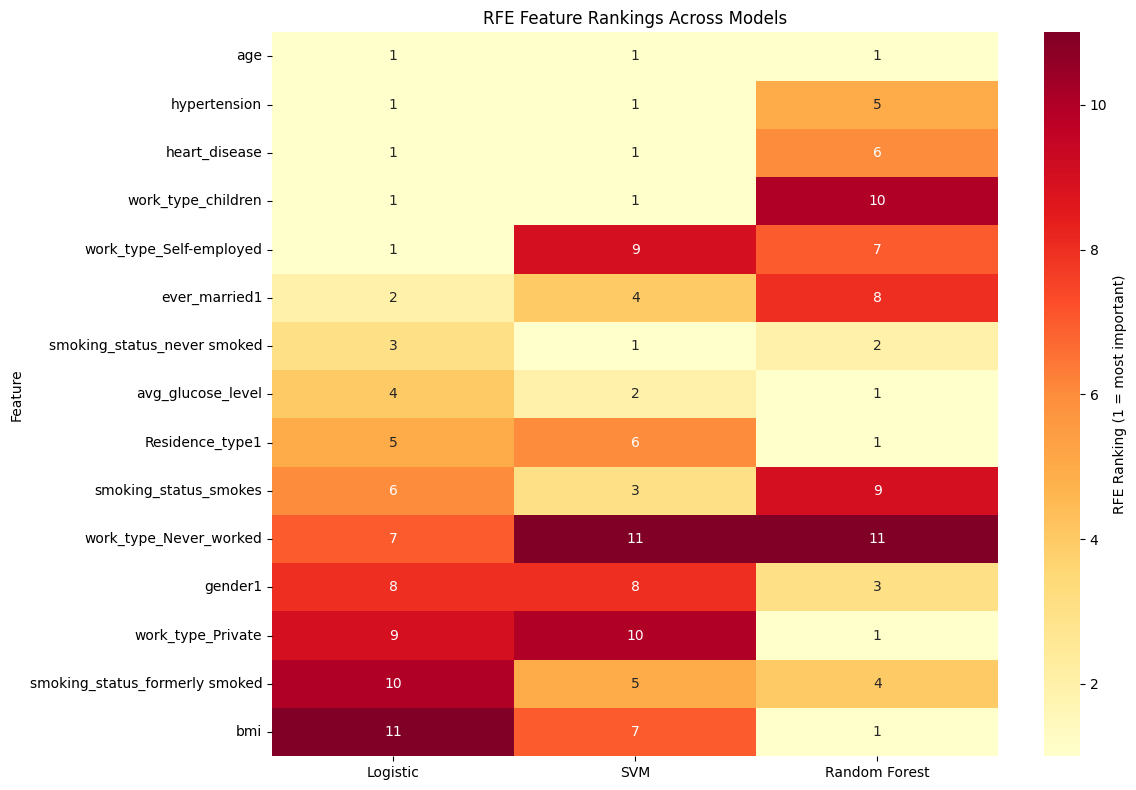

In [ ]:
# heatmap to compare rankings
combined_rfe = rfe_results[["Feature", "Ranking"]].merge(rfe_svm_results[["Feature", "SVM_Ranking"]], on = "Feature").merge(rfe_rf_results[["Feature", "RF_Ranking"]], on = "Feature")
ranking_heatmap = combined_rfe.set_index("Feature")
ranking_heatmap.columns = ["Logistic", "SVM", "Random Forest"]

plt.figure(figsize = (12, 8))
sns.heatmap(ranking_heatmap, annot = True, cmap = "YlOrRd", cbar_kws = {'label': 'RFE Ranking (1 = most important)'})
plt.title("RFE Feature Rankings Across Models")
plt.tight_layout()
plt.show()

This will be the feature selection technique that I use for the model training portion of this project. This is because this method eliminates features based off that specific model's worst performances

Looking at this merged heatmap, we can see that there are some variations in the top 5 features of each model
*  All 3 models include age in the Top 5
*  Both the Logistic Regression model and SVM have hypertension, heart_disease, and work_type_children are included in the Top 5
 *  Logistic Regression uniquely has work_type_self_employed in its Top 5
 *  SVM uniquely has smoking_status_never_smoked in its Top 5
*  Random Forest has the largest number of unique Top 5 features
 *  avg_glucose_level, Residence_type1, work_type_private, and bmi

### Model Training: Logistic Regression, Random Forest, SVM
*  Build and train the classification models using the selected features
 *  Logistic Regression, Random Forest, and Support Vector Machine (SVM) models

Performance Metrics:

*  Accuracy, precision, recall, F1-score, ROC - AUC Curve/Score

We will assess:
*  Impact of selected features on the model performance
*  Comparision before/after feature selection
*  Evaluation of overfitting reduction and model efficiency

In [ ]:
# filter features from RFE to only include ranking 1 (selected = true)
# the top 5 features from rfe of the previous section
logreg_features = rfe_results[rfe_results["Selected"] == True]["Feature"].values
svm_features = rfe_svm_results[rfe_svm_results["SVM_Selected"] == True]["Feature"].values
rf_features = rfe_rf_results[rfe_rf_results["RF_Selected"] == True]["Feature"].values

In [ ]:
# created to train and evaluate each model
def train_evaluate_model(model, X_train, X_test, y_train, y_test, features, model_name):
    print("\n--- ", model_name, " Evaluation ---")
    model.fit(X_train[features], y_train)
    y_pred = model.predict(X_test[features])

    # printing the classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot = True, fmt = "d", cmap = "Blues")
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


---  Logistic Regression  Evaluation ---
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.73      0.84      1944
           1       0.12      0.74      0.21       100

    accuracy                           0.73      2044
   macro avg       0.55      0.73      0.52      2044
weighted avg       0.94      0.73      0.80      2044



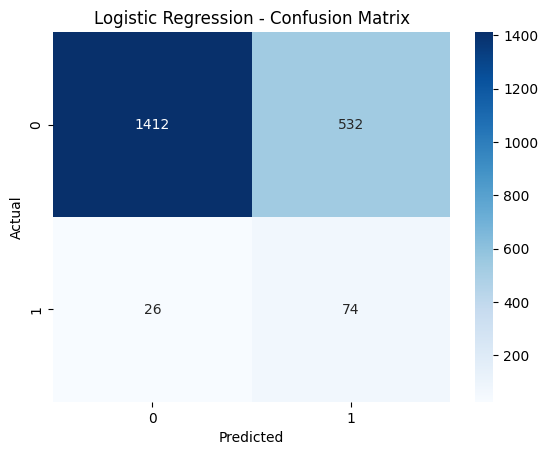


---  Random Forest  Evaluation ---
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.89      0.92      1944
           1       0.13      0.31      0.18       100

    accuracy                           0.86      2044
   macro avg       0.54      0.60      0.55      2044
weighted avg       0.92      0.86      0.89      2044



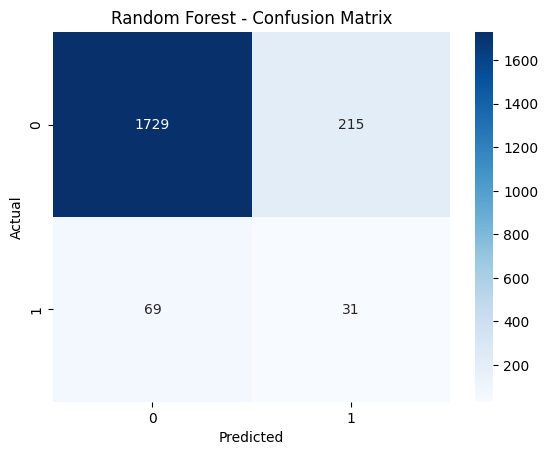


---  SVM  Evaluation ---
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.72      0.83      1944
           1       0.13      0.81      0.22       100

    accuracy                           0.72      2044
   macro avg       0.56      0.76      0.53      2044
weighted avg       0.94      0.72      0.80      2044



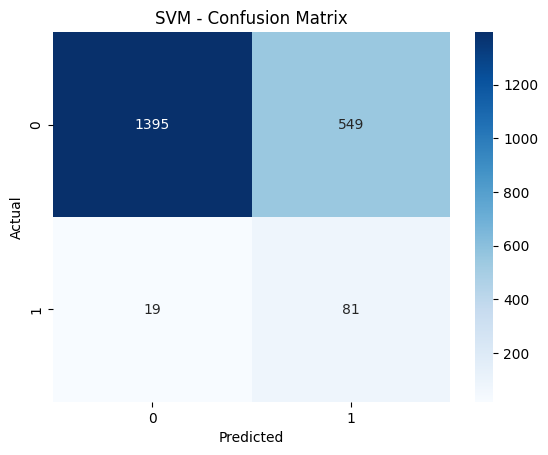

In [ ]:
# train/evaluate all three models
logreg_model = LogisticRegression(max_iter = 1000, solver = "liblinear")
rf_model = RandomForestClassifier(random_state = 42)
svm_model = SVC(kernel = "linear", probability = True)

auc_scores = {}
auc_scores['Logistic Regression'] = train_evaluate_model(logreg_model, X_train_smote, X_test, y_train_smote, y_test, logreg_features, "Logistic Regression")
auc_scores['Random Forest'] = train_evaluate_model(rf_model, X_train_smote, X_test, y_train_smote, y_test, rf_features, "Random Forest")
auc_scores['SVM'] = train_evaluate_model(svm_model, X_train_smote, X_test, y_train_smote, y_test, svm_features, "SVM")

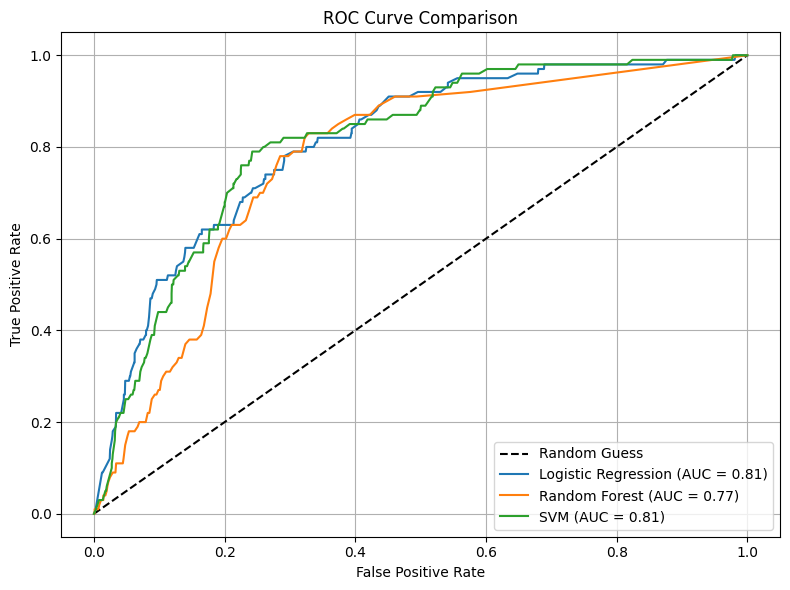

In [ ]:
# combined ROC plot
plt.figure(figsize = (8, 6))
plt.plot([0, 1], [0, 1], "k--", label = "Random Guess")

# go through each model and plot
for model_name, model, features in zip(["Logistic Regression", "Random Forest", "SVM"], [logreg_model, rf_model, svm_model], [logreg_features, rf_features, svm_features]):
  if hasattr(model, "predict_proba"):
    y_prob = model.predict_proba(X_test[features])[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label = f"{model_name} (AUC = {auc_score:.2f})")

plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc = "lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

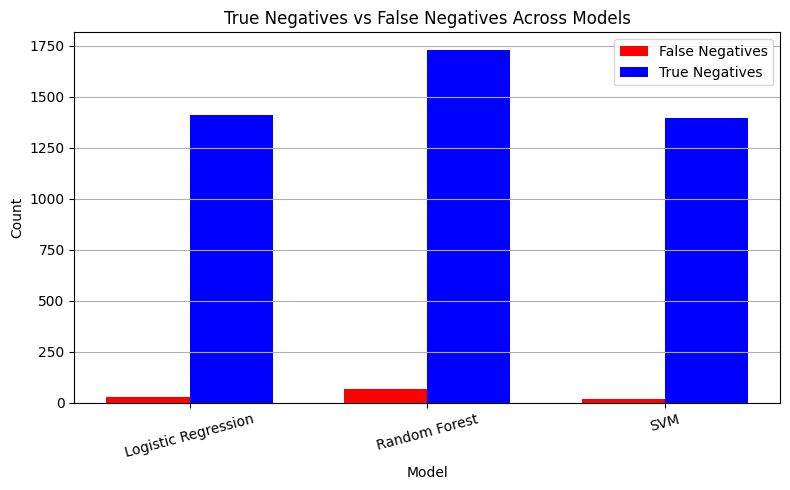

In [ ]:
# finding false negative/true negative values for each model
models = [logreg_model, rf_model, svm_model]
features_list = [logreg_features, rf_features, svm_features]
model_names = ["Logistic Regression", "Random Forest", "SVM"]

fn_counts = []
tn_counts = []

for model, features in zip(models, features_list):
    y_pred = model.predict(X_test[features])
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    fn_counts.append(fn)
    tn_counts.append(tn)

# plot TN vs FN line graph
plt.figure(figsize = (8, 5))
plt.bar(np.arange(len(model_names)) - 0.35 / 2, fn_counts, width = 0.35, color = "red", label = "False Negatives")
plt.bar(np.arange(len(model_names)) + 0.35 / 2, tn_counts, width = 0.35, color = "blue", label = "True Negatives")

plt.xticks(np.arange(len(model_names)), model_names, rotation = 15)
plt.title("True Negatives vs False Negatives Across Models")
plt.ylabel("Count")
plt.xlabel("Model")
plt.legend()
plt.grid(axis = "y")
plt.tight_layout()
plt.show()

--- Logistic Regression ---
Train set:
              precision    recall  f1-score   support

           0       0.82      0.73      0.77      2916
           1       0.76      0.84      0.80      2916

    accuracy                           0.79      5832
   macro avg       0.79      0.79      0.79      5832
weighted avg       0.79      0.79      0.79      5832

Test set:
              precision    recall  f1-score   support

           0       0.98      0.73      0.84      1944
           1       0.12      0.74      0.21       100

    accuracy                           0.73      2044
   macro avg       0.55      0.73      0.52      2044
weighted avg       0.94      0.73      0.80      2044

--- Random Forest ---
Train set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2916
           1       1.00      1.00      1.00      2916

    accuracy                           1.00      5832
   macro avg       1.00      1.00      1.00   

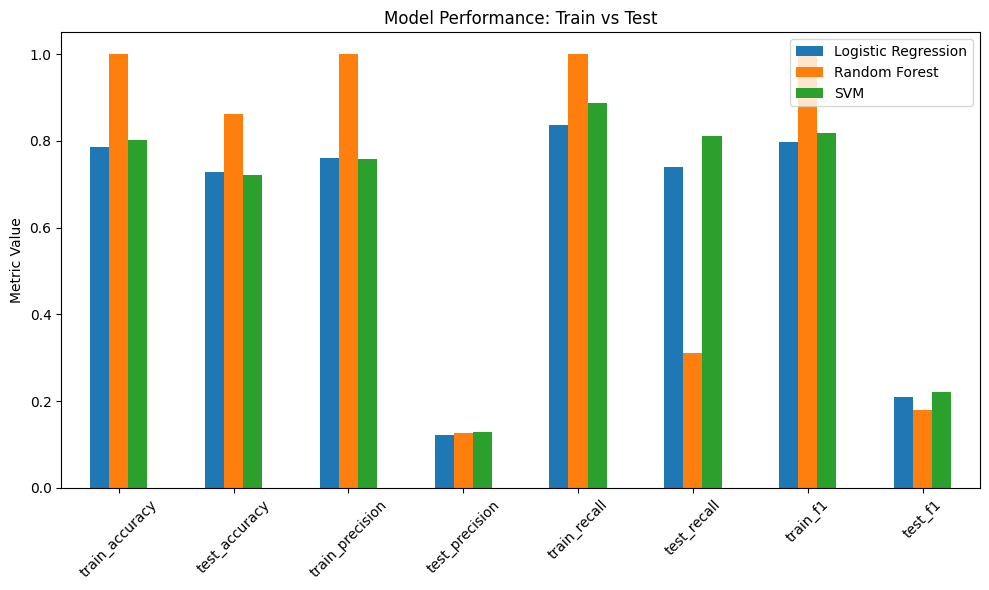

In [ ]:
# calculate/plot overfitting with classification reports
def plot_overfitting_with_reports(models, X_train, X_test, y_train, y_test, features_list, model_names):
    metrics = {}

    # go through each model and calculate metrics/reports
    for model, features, model_name in zip(models, features_list, model_names):
        # train set prediction
        train_pred = model.predict(X_train[features])
        print(f"--- {model_name} ---")
        print("Train set:")
        print(classification_report(y_train, train_pred))

        # test set prediction
        test_pred = model.predict(X_test[features])
        print("Test set:")
        print(classification_report(y_test, test_pred))

        metrics[model_name] = {
            "train_accuracy": accuracy_score(y_train, train_pred),
            "test_accuracy": accuracy_score(y_test, test_pred),
            "train_precision": precision_score(y_train, train_pred),
            "test_precision": precision_score(y_test, test_pred),
            "train_recall": recall_score(y_train, train_pred),
            "test_recall": recall_score(y_test, test_pred),
            "train_f1": f1_score(y_train, train_pred),
            "test_f1": f1_score(y_test, test_pred)
        }

    metrics_df = pd.DataFrame(metrics)

    # plot metrics between train and test sets
    metrics_df.plot(kind = 'bar', figsize = (10, 6))
    plt.title("Model Performance: Train vs Test")
    plt.ylabel("Metric Value")
    plt.xticks(rotation = 45)
    plt.tight_layout()
    plt.show()

# evaluate models and plot results
plot_overfitting_with_reports(models, X_train_smote, X_test, y_train_smote, y_test, features_list, model_names)

## Final Evaluation Feature Selection using Supervised Learning:

### **Feature Selected Model Evaluation**

Logistic Regression:

*  Precision - Out of all predicted strokes, only 12% of them were actually strokes (really bad and means that there are many cases of diagnosed stroke cases for patients that don't have stroke (waste of money/resources)).
*  Recall - Out of all the actual stroke cases, 74% of them were caught (which is not the best, but also not the worst).
*  F1-Score - With values of 0.84 and 0.21, the model does an adequete job with non-stroke cases and a poor job with stroke cases.

Random Forest:

*  Precision - Out of all predicted strokes, only 13% of them were actually strokes (really bad and means that there are many cases of diagnosed stroke cases for patients that don't have stroke (waste of money/resources)).
*  Recall - Out of all the actual stroke cases, only 31% of them were caught (really bad score which means that many patients with stroke are not getting the help they need).
*  F1-Score - With values of 0.92 and 0.18, the model does a great job with non-stroke cases and a very poor job with stroke cases.

SVM:

*  Precision - Out of all predicted strokes, only 13% of them were actually strokes (really bad and means that there are many cases of diagnosed stroke cases for patients that don't have stroke (waste of money/resources)).
*  Recall - Out of all the actual stroke cases, 81% of them were caught (which is not the best, but also not the worst).
*  F1-Score - With values of 0.83 and 0.22, the model does an adequete job with non-stroke cases and a poor job with stroke cases.


Logistic Regression and SVM are the vest at detecting stroke cases (as seen with their higher recall values). On the other hand, Random Forest is better at overall accuracy. However, none of the models are particularly good at precision.

<br>
Comparing the values pre and post-feature selection, we can see that there was not a large improvement in precision or recall in any of the models.
*  As of right now, SVM is best for screening for stroke
*  As of right now, Random Forest is the best of general use

***

**ROC Curve**

Looking at the ROC-AUC Curve, we can see that all three models are similar in curves. Theis indicates that all three models have similar abilities when it comes to dintinguishing between stroke vs non-stroke classes.
*  However more specifically, Logistic Regression and SVM have an AUC value of 0.81
 *  Random Forest has an AUC value of 0.77

The curves also show us that all three models perform better than just simply guessing.

***

**True Negatives vs False Negatives Comparison**

I decided to also plot the number of true negatives and false negatives for each model as ROC-AUC covered true positives and false positives.

Looking at the TN vs FN plot, we can see that all three models are good at correctly identifying patients who do not have a stroke and not misdiagnosing a no stroke diagnosis to a stroke patient (which is very important as we want to find all stroke patients for treatment).

***

**Train vs Test Sets**


Logistic Regression:

**Train**
*  Precision - Out of all predicted classes, an average 79% of them were actually belonging of those classes.
*  Recall - Out of all the actual cases for each class, an average 79% of them were caught.
*  F1-Score - With values of 0.79 for both cases, the model does a good job with non-stroke cases and stroke cases.

**Test**
*  Precision - Out of all predicted strokes, 12% of them were actually stroke patients.
*  Recall - Out of all the actual cases for stroke, 74% of them were caught.
*  F1-Score - With values of 0.84 and 0.21, the model does an adequete job with non-stroke cases and a poor job with stroke cases.

Random Forest:

**Train**
*  Precision - Out of all predicted classes, an average 100% of them were actually belonging of those classes.
*  Recall - Out of all the actual cases for each class, an average 100% of them were caught.
*  F1-Score - With values of 1.0 for both cases, the model does a perfect job with non-stroke cases and stroke cases.

**Test**
*  Precision - Out of all predicted strokes, 13% of them were actually stroke patients.
*  Recall - Out of all the actual cases for stroke, 31% of them were caught.
*  F1-Score - With values of 0.92 and 0.18, the model does an good job with non-stroke cases and a poor job with stroke cases.

SVM:

**Train**
*  Precision - Out of all predicted classes, an average 81% of them were actually belonging of those classes.
*  Recall - Out of all the actual cases for each class, an average 80% of them were caught.
*  F1-Score - With values of 0.80 for both cases, the model does a good/moderate job with non-stroke cases and stroke cases.

**Test**
*  Precision - Out of all predicted strokes, 13% of them were actually stroke patients.
*  Recall - Out of all the actual cases for stroke, 81% of them were caught.
*  F1-Score - With values of 0.83 and 0.22, the model does an adequete job with non-stroke cases and a poor job with stroke cases.

<br>
By comparing train vs test metrics (accuracy, precision, recall, F1-score), I am able to check whether the model is overfitting (if the train set performance is much better than the test set).
*  If training accuracy is much higher, there may be overfitting
*  If both train and test performances are similar and good, the model is efficient and not overfitting
*  Reducing overfitting is beneficial due the fact that this is a relatively small dataset
 *  Narrow scrope -> reduce noise

<br>

Comparing the values of both the training and testing sets, we can see:

**Logistic Regression**
*  No overfitting

**Random Forest**
*  Clear sign of overfitting
 *  Perfect score of 1.00 for precision, recall, and f1-score

**Logistic Regression**
*  No overfitting

***
**Features for Best Stroke Prediction**
*  Across multiple feature selection methods, we can see that there reoccuring top predictors of stroke
 *  age, heart_disease, hypertension, avg_glucose_level, ever_married1, work_type_children, work_type_self_employed
 *  All of these features are all features related to health so it makes sense that these features affect stroke occurence
 *  All of the expected features were included in this list

*  Only the Random Forest Model had unique features
 *  Residence_type1, work_type_private, bmi
 *  Most were ranked low in the other models

***
**How Accurate were We?**
*  Random Forest was the most accurate model when it came to predicting stroke cases
 *  However, the accuracy is misleading due to the imbalance of classes
*  Both Logistic Regression and SVM are both balanced models

<br>
*  Overall, we were able to predict stroke/no stroke moderately well using demographic and medical features

***

**Ideas that Might Improve Results**
*  XGBoost, Gradient Boosting
*  Test using advanced feature selection
*  Try different imputation strategies for missing bmi/smoking_status values
*  Use the other methods of ranking that were mentioned in this project
*  Larger dataset
*  Additional demographic/medical features